In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import numpy as np
from PIL import Image
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Normalize, Resize, InterpolationMode, ToTensor  

# from data_process import img_to_hdf5
# from zero_shot import load_clip
# from linear_probing import CLIPImageDataset, get_embs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

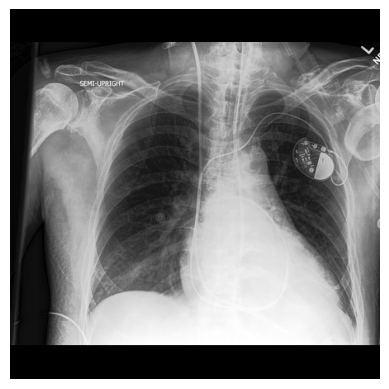

In [16]:
cxrs = h5py.File("../data/chexpert_test.h5", 'r')['cxr']
img = cxrs[0]
_ = plt.imshow(img, cmap='gray')
_ = plt.axis('off')
_ = plt.show()

In [10]:
df_test = pd.read_csv('/home/than/padchest/padchest_test_test.csv')
df_train = pd.read_csv('/home/than/padchest/padchest_test_train.csv')
df_test['name'] = df_test['ImageID']
df_test['Path'] = df_test['ImageID'].apply(lambda x: '/home/than/padchest/test/' + x)
df_train['Path'] = df_train['name'].apply(lambda x: '/home/than/padchest/test_train/' + x)
df_test['is_test'] = True

df_train['is_test'] = False

In [18]:
df_test.iloc[:, 1:-3].head()

,total atelectasis,reservoir central venous catheter,lipomatosis,subacromial space narrowing,surgery neck,hilar congestion,suboptimal study,miliary opacities,mediastinal shift,nsg tube,...,alveolar pattern,artificial heart valve,reticular interstitial pattern,pneumothorax,hilar enlargement,cardiomegaly,hiatal hernia,dextrocardia,hydropneumothorax,aortic endoprosthesis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = pd.concat([df_test, df_train], ignore_index=True)
df.to_csv('csvs/padchest_test.csv', index=False)

In [4]:
preprocess = Compose([
    Resize(224, interpolation=InterpolationMode.BICUBIC),
    ToTensor(),
    Normalize((101.48761, 101.48761, 101.48761), (83.43944, 83.43944, 83.43944))
])

tr_dset = CLIPImageDataset(df_train["Path"].tolist(), preprocess)

In [12]:
tr_dset[0]

tensor([[[-1.2044, -1.2044, -1.2045,  ..., -1.2079, -1.2076, -1.2072],
         [-1.2044, -1.2045, -1.2045,  ..., -1.2080, -1.2076, -1.2073],
         [-1.2044, -1.2044, -1.2045,  ..., -1.2091, -1.2078, -1.2075],
         ...,
         [-1.2067, -1.2067, -1.2067,  ..., -1.2067, -1.2065, -1.2064],
         [-1.2066, -1.2067, -1.2067,  ..., -1.2068, -1.2065, -1.2064],
         [-1.2072, -1.2074, -1.2075,  ..., -1.2075, -1.2072, -1.2070]],

        [[-1.2044, -1.2044, -1.2045,  ..., -1.2079, -1.2076, -1.2072],
         [-1.2044, -1.2045, -1.2045,  ..., -1.2080, -1.2076, -1.2073],
         [-1.2044, -1.2044, -1.2045,  ..., -1.2091, -1.2078, -1.2075],
         ...,
         [-1.2067, -1.2067, -1.2067,  ..., -1.2067, -1.2065, -1.2064],
         [-1.2066, -1.2067, -1.2067,  ..., -1.2068, -1.2065, -1.2064],
         [-1.2072, -1.2074, -1.2075,  ..., -1.2075, -1.2072, -1.2070]],

        [[-1.2044, -1.2044, -1.2045,  ..., -1.2079, -1.2076, -1.2072],
         [-1.2044, -1.2045, -1.2045,  ..., -1

In [13]:
model = load_clip(
        model_path='/home/than/DeepLearning/CheXzero/checkpoints/CheXzero_Models/best_64_5e-05_original_22000_0.864.pt', 
        pretrained=True, 
        context_length=77
    )

/home/than/anaconda3/envs/chexzero/lib/python3.8/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [17]:
emb = model.encode_image(tr_dset[0].unsqueeze(0))
emb.shape

torch.Size([1, 512])

## explore padchest labels

In [24]:
df = pd.read_csv('/home/than/padchest/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv')
df = df[df['ImageID'].isin(df_train['ImageID'])]
df.head()

/home/than/anaconda3/envs/chexzero/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3266: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,10,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,...,10,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
5,5,313903302629300007485735352869488750471_75sg0k...,0,20170125,313903302629300007485735352869488750471,3707275269754751392247446521222810702,1978.0,M,NaN,AP,...,None,1192,5310833,objet mejori radiolog con practic resolucion ...,Physician,"['unchanged', 'alveolar pattern', 'interstitia...","['loc basal', 'loc left']","[['unchanged'], ['alveolar pattern', 'intersti...",['C1332240' 'C2073538'],['C1282378' 'C0443246']
7,7,3137231742710829928-247610802266403640553_kine...,0,20150804,3137231742710829928-247610802266403640553,93535126770783451980359712286922420997,1957.0,M,NaN,PA,...,0,299,4969767,radiografi actual comp con previ 26 juni pers...,Physician,"['laminar atelectasis', 'pleural effusion', 'a...","['loc basal', 'loc subsegmental', 'loc pleural...","[['laminar atelectasis', 'loc subsegmental', '...",['C2073625' 'C4305366' 'C0185792'],['C1282378' 'C0929165' 'C0032225' 'C0444532' '...
8,8,313723174271082992847610802266403640553-4_hhi4...,0,20150521,313723174271082992847610802266403640553-4,93535126770783451980359712286922420997,1957.0,M,NaN,AP_horizontal,...,None,304,4923353,sin grand cambi con respect estudi previ ayer...,Physician,['unchanged'],[],[['unchanged']],[],[]


In [26]:
df['Projection'].value_counts()
df['Projection'].value_counts()['PA'] / len(df['Projection'])

PA               16785
AP_horizontal     1323
AP                 381
Name: Projection, dtype: int64

0.9078370923251663